IMPORTS

In [1]:
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, auc
drive.mount('/content/drive')


Mounted at /content/drive


VARIABLES

In [2]:
files_directory = '/content/drive/MyDrive/Machine Learning Projects/Project 1/' # @param {type:"string"}

READ FILES

In [3]:

df_data_a = pd.read_csv(f'{files_directory}A1_dataA.tsv', sep='\t', header=0)
df_data_b = pd.read_csv(f'{files_directory}A1_dataB.tsv', sep='\t', header=0)

def print_df_head(df, dataset_name):
    print(f'dataset {dataset_name} head():- ')
    print(df.head())
    print('\n')

def check_for_nan_and_null_values(df, dataset_name):
    print(f'NaN or null values present in data {dataset_name}: {df.isnull().values.any()}')

check_for_nan_and_null_values(df_data_a, 'A')
print_df_head(df_data_a, 'A')
check_for_nan_and_null_values(df_data_b, 'B')
print_df_head(df_data_b, 'B')

NaN or null values present in data A: False
dataset A head():- 
         X1        X2        X3        X4        X5  class
0  0.941443  0.739137  0.789515  0.783686  0.165450      1
1  0.903789  0.774421  1.807503 -1.403254  0.531660      1
2  0.988921  0.763048  1.608549  0.354220  0.979188      1
3  0.945123  1.167735  1.140172 -0.749005  0.171429      0
4  0.912966  1.035160  0.548504  0.499823  0.084890      0


NaN or null values present in data B: False
dataset B head():- 
         X1        X2        X3        X4        X5  class
0  0.509022  0.977143  1.807426 -0.456832  1.114991      1
1  0.431006  0.340303 -0.991420 -0.533280  0.033497      1
2  0.601544  1.627891 -0.144424  0.070053  0.485216      1
3 -0.346139  0.435936  1.240060  0.286332  0.475602      1
4  1.669372  0.390462  1.225110 -0.809030  0.088785      1




In the above we can observe that we have 5 feature columns and the 6th 'class' column is going to be our target variable. We do not have any unusable or NaN columns and hence we do not need to drop any columns for now.

EDA

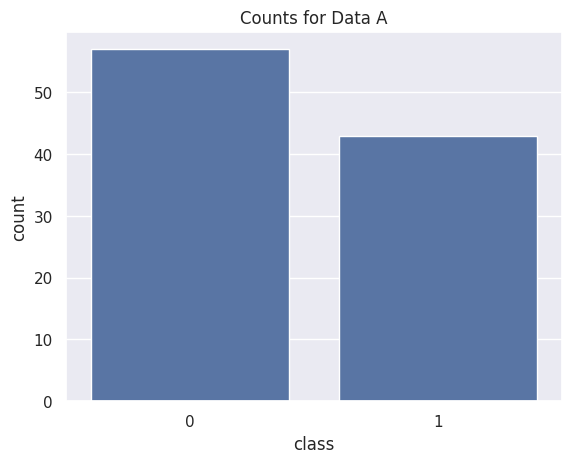

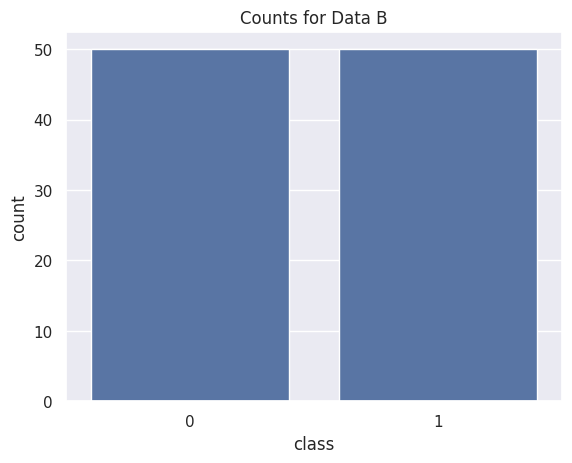

<Figure size 640x480 with 0 Axes>

In [4]:
sns.set(style="darkgrid")
def plot_count_plot(df, dataset_name):
    sns.countplot(x = "class", data = df).set_title(f'Counts for Data {dataset_name}')
    plt.figure()

plot_count_plot(df_data_a, 'A')
plot_count_plot(df_data_b, 'B')

From the above we can observe that for Dataset A, we have 60 odd observations of class 0 and 40 odd observations of class 1. For Dataset B, the observations are equal (50) for both classes 0 and 1 respectively. Hence, the dataset A is unbalanced whereas dataset B is balanced.

DESCRIPTION

In [5]:
def describe_df(df, dataset_name):
    print(f'dataset {dataset_name} Describe:- ')
    print(df.describe())

describe_df(df_data_a, 'A')
describe_df(df_data_b, 'B')

dataset A Describe:- 
               X1          X2          X3          X4          X5      class
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.00000
mean     0.942780    0.886573    0.645312    0.085737    0.322063    0.43000
std      0.030371    0.353656    0.865150    0.668028    0.403475    0.49757
min      0.876493   -0.297338   -1.953451   -1.403254   -0.579735    0.00000
25%      0.916869    0.687141    0.093547   -0.399083    0.063227    0.00000
50%      0.944842    0.924123    0.714524    0.210569    0.302740    0.00000
75%      0.966008    1.136096    1.348120    0.511489    0.649273    1.00000
max      1.017505    1.556465    2.147693    1.771226    1.254086    1.00000
dataset B Describe:- 
               X1          X2          X3          X4          X5       class
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean     0.292705    0.830999    0.592536    0.253281    0.398697    0.500000
std      0.765458    0.777268

Here we can observe that the range is different (albeit close however still different) for all the features for both data A as well as data B. For e.g., the range for dataset A for feature X1 is 0.876493 to 1.017505 whereas for feature X3, it is -1.953451 to 2.147693 and the range for dataset B for feature X1 is -1.373955 to 2.300395 whereas for feature X3, it is -1.839730 to 2.885349. Therefore, we need to transform our data using standardization or normalization.

MIN MAX NORMALIZATION

In [6]:
def normalize_data(df):
    cols = ['X1', 'X2', 'X3', 'X4', 'X5']
    scaler = MinMaxScaler()
    df[cols] = scaler.fit_transform(df[cols])
    return df

df_data_a = normalize_data(df_data_a)
df_data_b = normalize_data(df_data_b)
print_df_head(df_data_a, 'A')
print_df_head(df_data_b, 'B')


dataset A head():- 
         X1        X2        X3        X4        X5  class
0  0.460598  0.559107  0.668829  0.688913  0.406356      1
1  0.193570  0.578141  0.917050  0.000000  0.606054      1
2  0.797294  0.572006  0.868538  0.553626  0.850096      1
3  0.486694  0.790307  0.754332  0.206096  0.409617      0
4  0.258648  0.718791  0.610063  0.599493  0.362427      0


dataset B head():- 
         X1        X2        X3        X4        X5  class
0  0.512465  0.520516  0.771872  0.340569  0.818678      1
1  0.491233  0.375625  0.179534  0.319043  0.451550      1
2  0.537646  0.668571  0.358789  0.488930  0.604892      1
3  0.279727  0.397384  0.651797  0.549829  0.601629      1
4  0.828263  0.387037  0.648633  0.241398  0.470318      1




DENSITY PLOTS

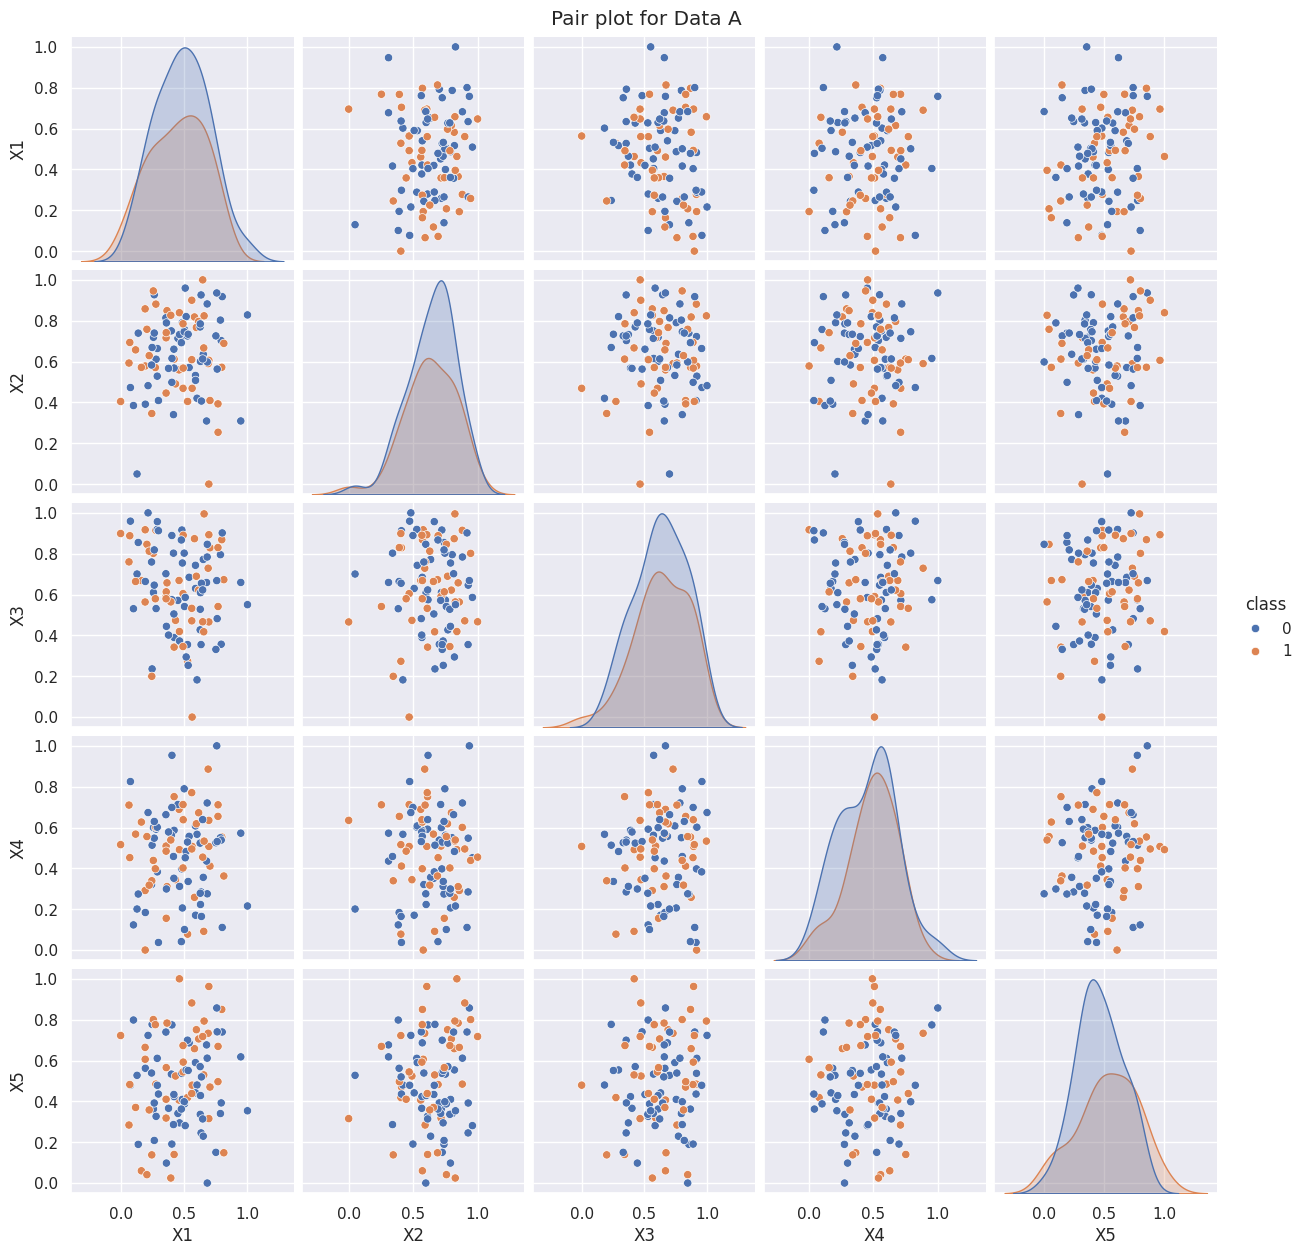

<Figure size 640x480 with 0 Axes>

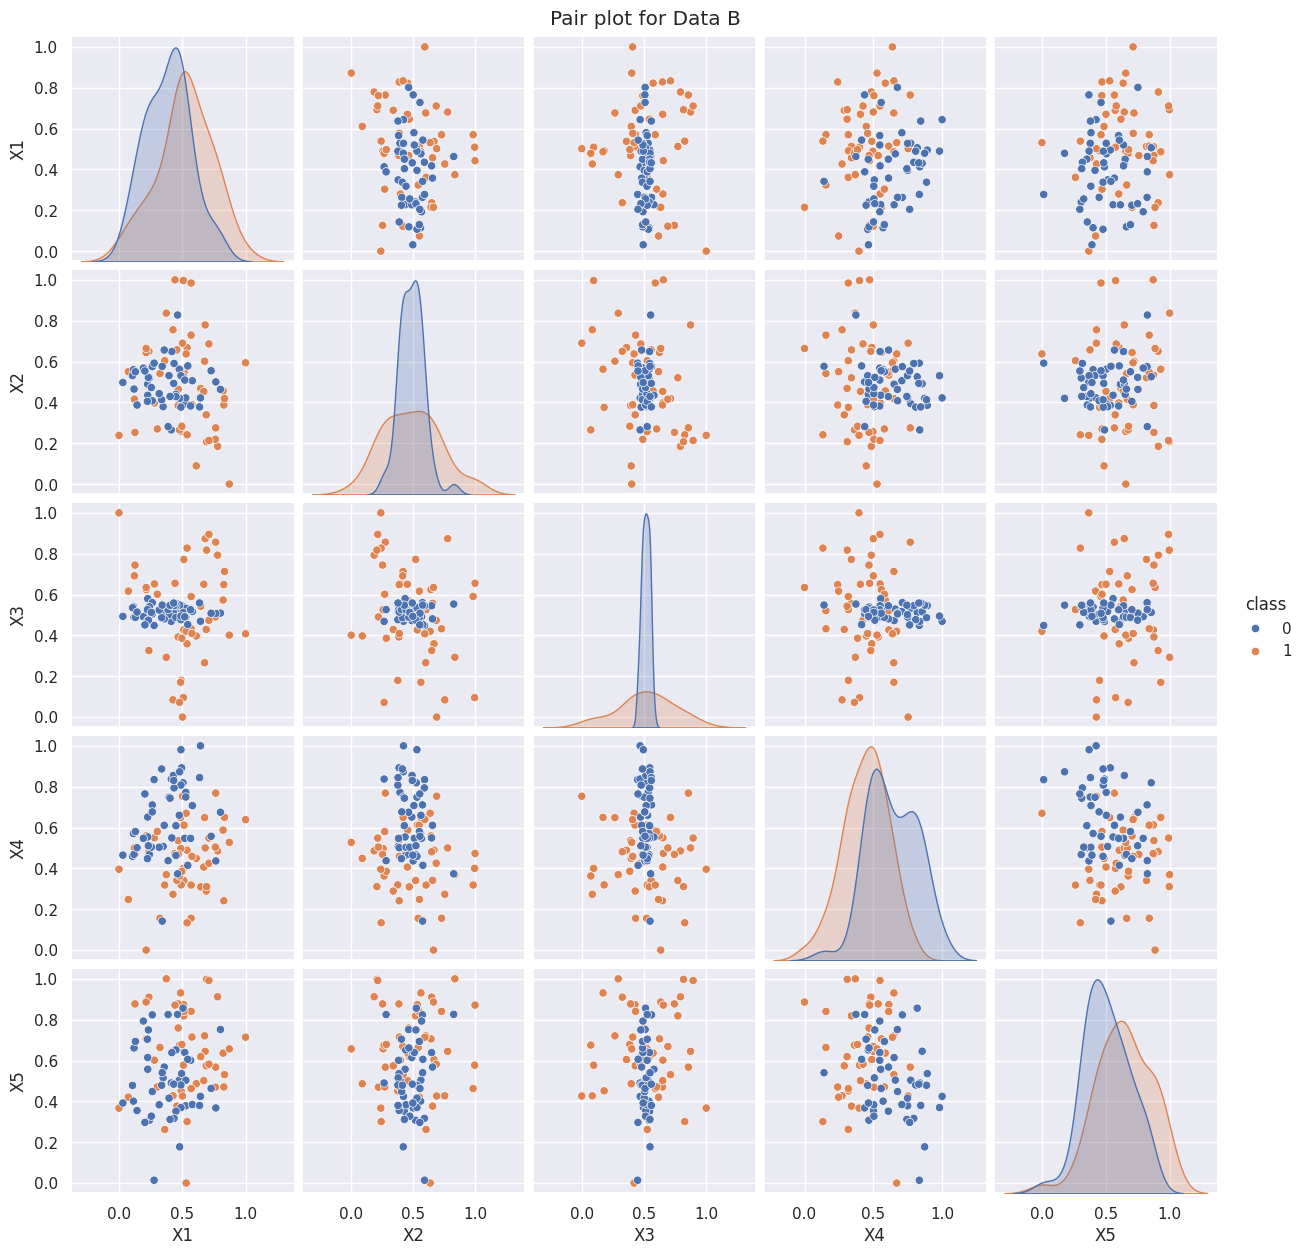

<Figure size 640x480 with 0 Axes>

In [7]:
def plot_pair_plot(df, dataset_name):
    p = sns.pairplot(df.iloc[:,:], hue = 'class')
    p.fig.suptitle(f'Pair plot for Data {dataset_name}', y=1.005)
    plt.figure()

plot_pair_plot(df_data_a, 'A')
plot_pair_plot(df_data_b, 'B')

From the above, for Pair plot A:-
Here we can observe that for Data A, the density plot for features X3 and X4 both have the same variance/standard deviation and also the means (especially for feature X4) are of similar heights for both the classes. This means that these features might not contribute much in terms of information to our model for classification. Also, apart from the difference in means, the variance for features X1 and X2 seem to be very similar for both classes 0 and 1 and hence, these features might contribute to our model’s input but they certainly do not have the ideal density plots. When comparing the 5 features, it seems that feature X5 could be the most informative since there is some difference in the standard deviation as well as big difference between the means for classes 0 and 1 for feature X5. However, looking at the scatter plots for all the 5 features for both classes 0 and 1, it is very evident that a decent KNN model could be achieved but it would be impossible to achieve a model with really good performance since the decision boundary would be difficult to plot dividing the 2 classes’ observations.

for Pair plot B:-
In contrast to Dataset A, all 5 features for dataset B seem to have big differences between their respective density plots for classes 0 and 1. Even within the scatter plots, we can see the observations being in separate areas/regions and hence, plotting a decision boundary that can successfully differentiate between most/a significant number of observations for both classes 0 and 1 could be very well achieved and hence, a good performing KNN model should be possible for the given data in dataset B.

SPLIT INTO X AND Y

In [8]:
def get_X_and_y(df):
    y = df['class']
    X = df.drop(['class'], axis = 1 )
    return X, y

X_a, y_a = get_X_and_y(df_data_a)
X_b, y_b = get_X_and_y(df_data_b)

VIOLIN PLOTS

<ipython-input-9-69f083d664d7>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="features", y="value", hue="class", data=X, split=True, scale='width').set_title("Violin Plot for Data " + dataset_name)
<ipython-input-9-69f083d664d7>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="features", y="value", hue="class", data=X, split=True, scale='width').set_title("Violin Plot for Data " + dataset_name)


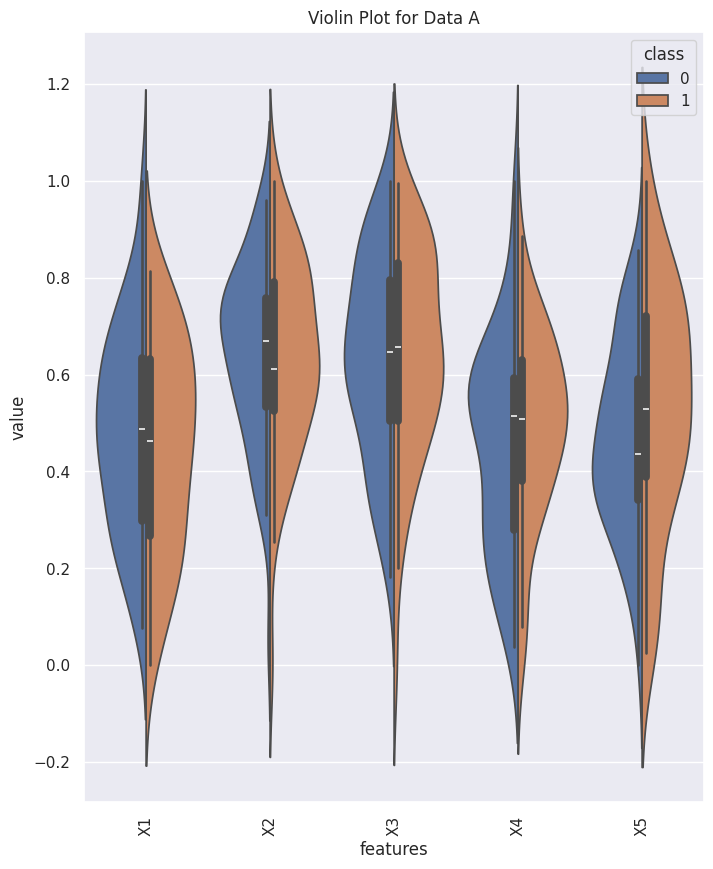

<Figure size 640x480 with 0 Axes>

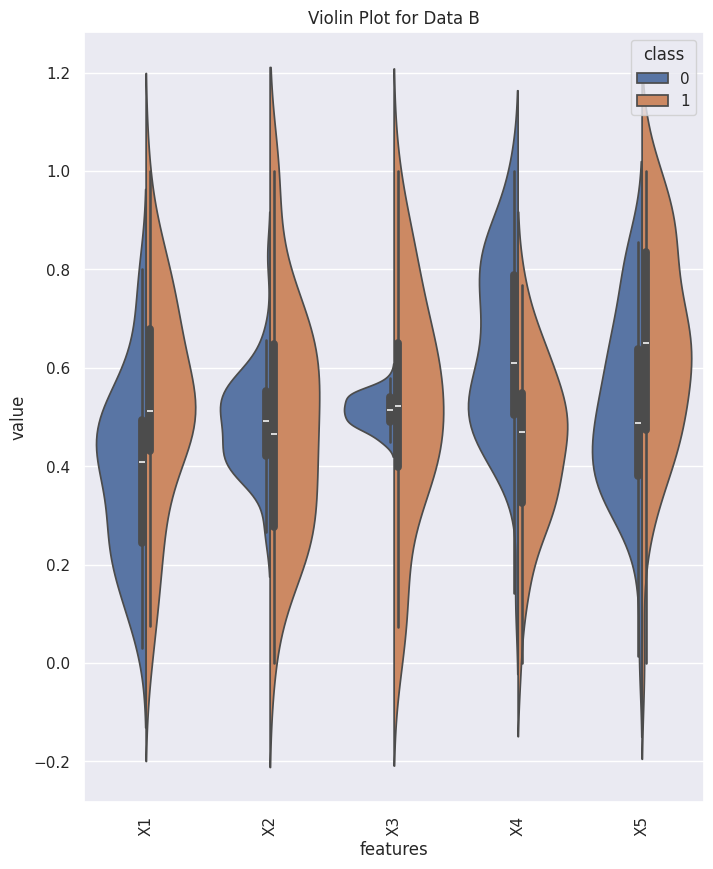

<Figure size 640x480 with 0 Axes>

In [9]:
def violin_plot_for_data(y, X, dataset_name):
    X = pd.concat([y, X], axis=1)
    X = pd.melt(X, id_vars="class", var_name="features", value_name='value')
    plt.figure(figsize=(8, 10))
    sns.violinplot(x="features", y="value", hue="class", data=X, split=True, scale='width').set_title("Violin Plot for Data " + dataset_name)
    plt.xticks(rotation=90)
    plt.figure()

violin_plot_for_data(y_a, X_a, 'A')
violin_plot_for_data(y_b, X_b, 'B')

From the above, for plot A:-
Here we can observe that the medians for features X3 and X4 for both the classes are very similar. For feature X3, even the interquartile range and 1.5x interquartile range are very similar for both classes 0 and 1. It therefore leads us to believe that feature X3 should be of very little use to us in terms of classification between classes 0 and 1. Even feature X4 could give us an inferior performing classification model. Hence it would be better if we just use features X1, X2 and X5 for our classification model.

for plot B:-
For data B, the violin plots for all 5 features for classes 0 and 1 are very different and hence, all 5 features should help us in classification using our KNN model.

BOX PLOTS

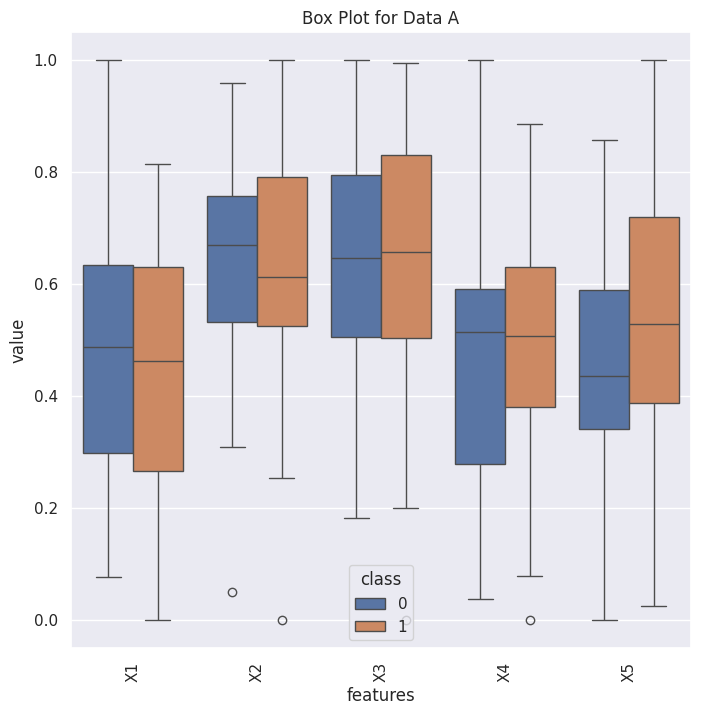

<Figure size 640x480 with 0 Axes>

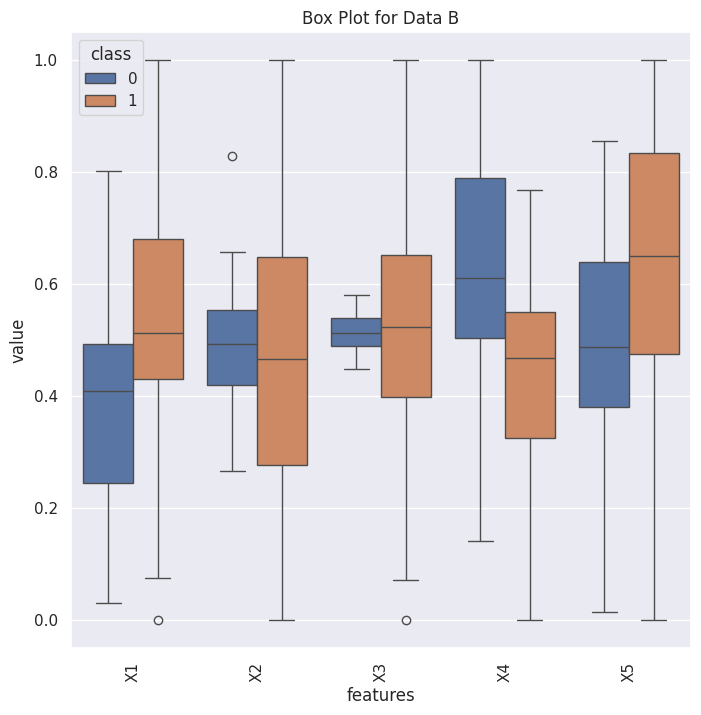

<Figure size 640x480 with 0 Axes>

In [10]:
def box_plot_for_data(y, X, dataset_name):
    X = pd.concat([y, X], axis=1)
    X = pd.melt(X, id_vars="class", var_name="features", value_name='value')
    plt.figure(figsize=(8, 8))
    sns.boxplot(x="features", y="value", hue="class", data=X).set_title("Box Plot for Data " + dataset_name)
    plt.xticks(rotation=90)
    plt.figure()

box_plot_for_data(y_a, X_a, 'A')
box_plot_for_data(y_b, X_b, 'B')

From the above, for plot A:-
Again, we can observe here that the box plots for feature X3 for both classes 0 and 1 are very similar. Hence, a trend here is very apparent now that the data from feature X3 would not help us with our classification model.

for plot B:-
Here we can observe that the box plots for all the features of data B for the 2 classes are very different. The trend that we can observe for data B is that all 5 features have information that would help us with our classification model.

JOINT PLOTS

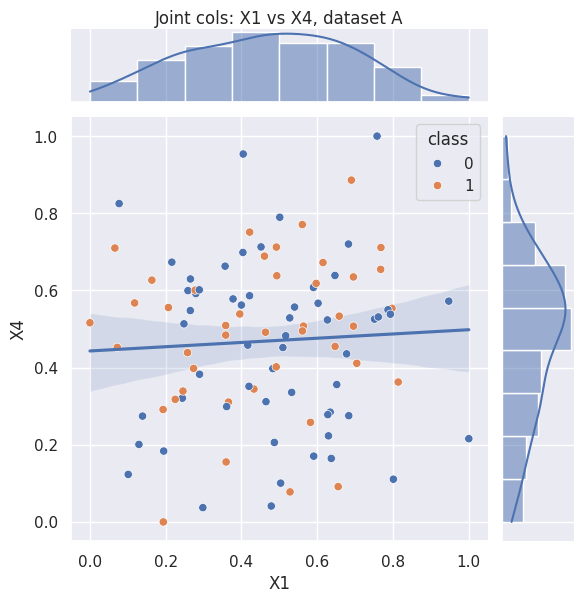

<Figure size 640x480 with 0 Axes>

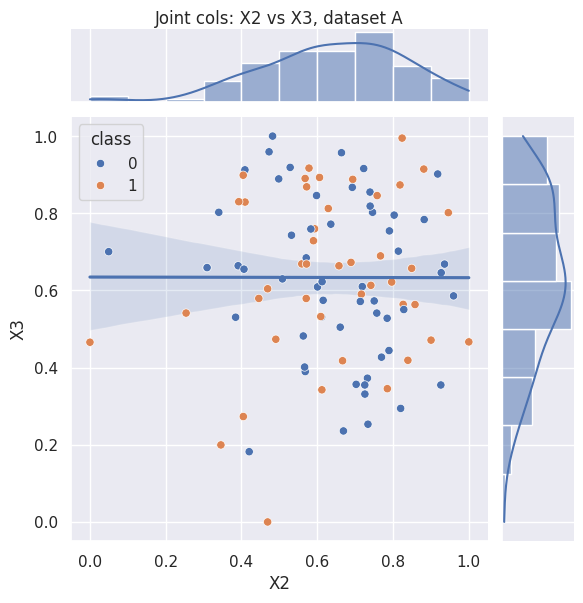

<Figure size 640x480 with 0 Axes>

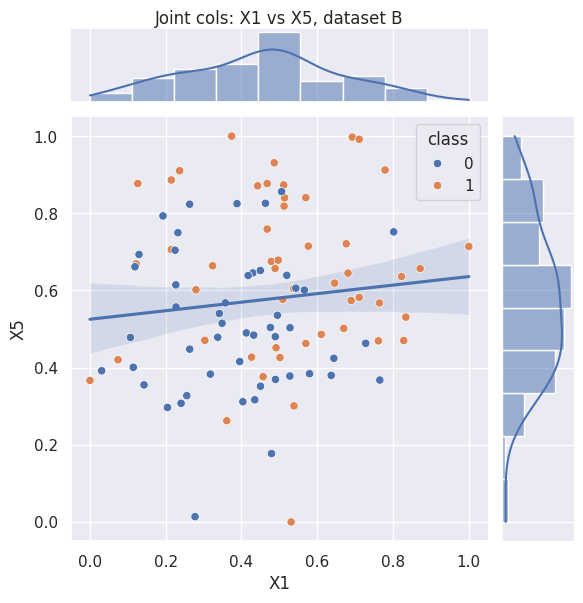

<Figure size 640x480 with 0 Axes>

In [11]:
def joint_plot_for_data(X, dataset_name, cols):
    p = sns.jointplot(x=X[cols[0]], y=X[cols[1]], data=X, kind='reg', scatter = False)
    p = sns.scatterplot(x=X[cols[0]], y=X[cols[1]], hue=X['class'])
    p.set_title(f'Joint cols: {cols[0]} vs {cols[1]}, dataset {dataset_name}', y=1.2)
    plt.figure()


joint_plot_for_data(df_data_a, 'A', ['X1', 'X4'])
joint_plot_for_data(df_data_a, 'A', ['X2', 'X3'])
joint_plot_for_data(df_data_b, 'B', ['X1', 'X5'])

From the above, for plot A:-
In the first plot it is for feature X1 vs X4 to check if they have any dependency. However, we can observe that there is very little dependency or correlation between the 2 features. In the second joint plot, we check to see if the features X2 and X3 have any dependency but they do not either as evident from the plot. Hence, we cannot drop features because of dependence.

for plot B:-
Here we plot to check if features X1 and X5 have any dependence but they do not, as shown in the plot. Hence, we can conclude that none of the features are redundant which can be dropped.

HEATMAP

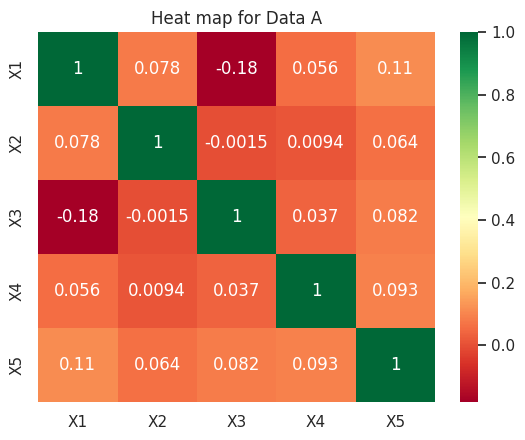

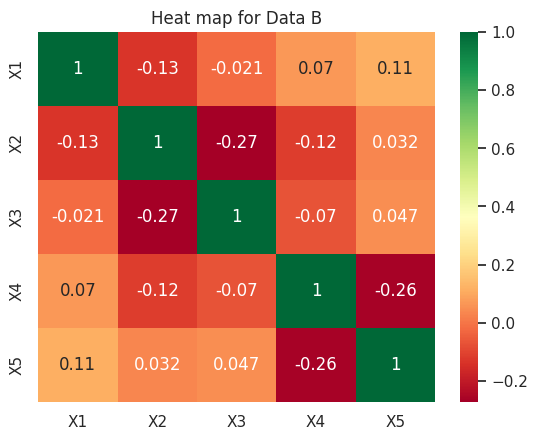

<Figure size 640x480 with 0 Axes>

In [12]:
def heat_plot_for_data(X, dataset_name):
    corrmat = X.corr()
    top_corr_features = corrmat.index
    g = sns.heatmap(X[top_corr_features].corr(), annot=True, cmap="RdYlGn").set_title("Heat map for Data " + dataset_name)
    plt.figure()

heat_plot_for_data(X_a, 'A')
heat_plot_for_data(X_b, 'B')

Here we plotted heatmaps to check dependence of features for both datasets A and B. However, we can observe that none of the features have dependence on any other feature for both datasets A as well as B. Hence, none of the features are redundant and cannot be dropped because of dependency.

HYPOTHESIS AND ANNOTATIONS

As we have observed in the density/pair plot, violin plot and box plot for dataset A, the features X3 and X4 might not contribute much in terms of information to our KNN model and hence, it would be better if we drop these 2 columns as this would reduce the dimensionality of our data, get rid of unnecessary/irrelevant/noisy features that do not contribute much to our model, thereby increasing the performance of the model.

K FOLDS CROSS VALIDATION

Here we perform K-Folds cross validation for both datasets A and B. The number of total instances/observations in our dataset is fairly small (100) and hence, 10 folds would be better than 5 since 5 folds would result in a considerable overestimate of prediction error. For our hyper parameters, we have the number of neighbours viz. 3, 5, 7, 9, 10, 11, 13 and 15, the distance type viz. Manhattan and Euclidean & the weights viz. uniform and distance. Hence, we perform K-folds CV for all the permutation/combinations of our hyperparameters to find the best possible hyperparameter combination from the ones we have chosen already for both datasets A and B. Then we plot precision recall curves for each combination (precision and recall are aggregated on 10 folds) to evaluate the performance of each combination and find the top performing ones. Here we do not use accuracy since accuracy does not accurately portray the performance of a classification model with unbalanced data (like we have in dataset A). We perform Stratified K Fold CV since we have unbalanced data in dataset A.

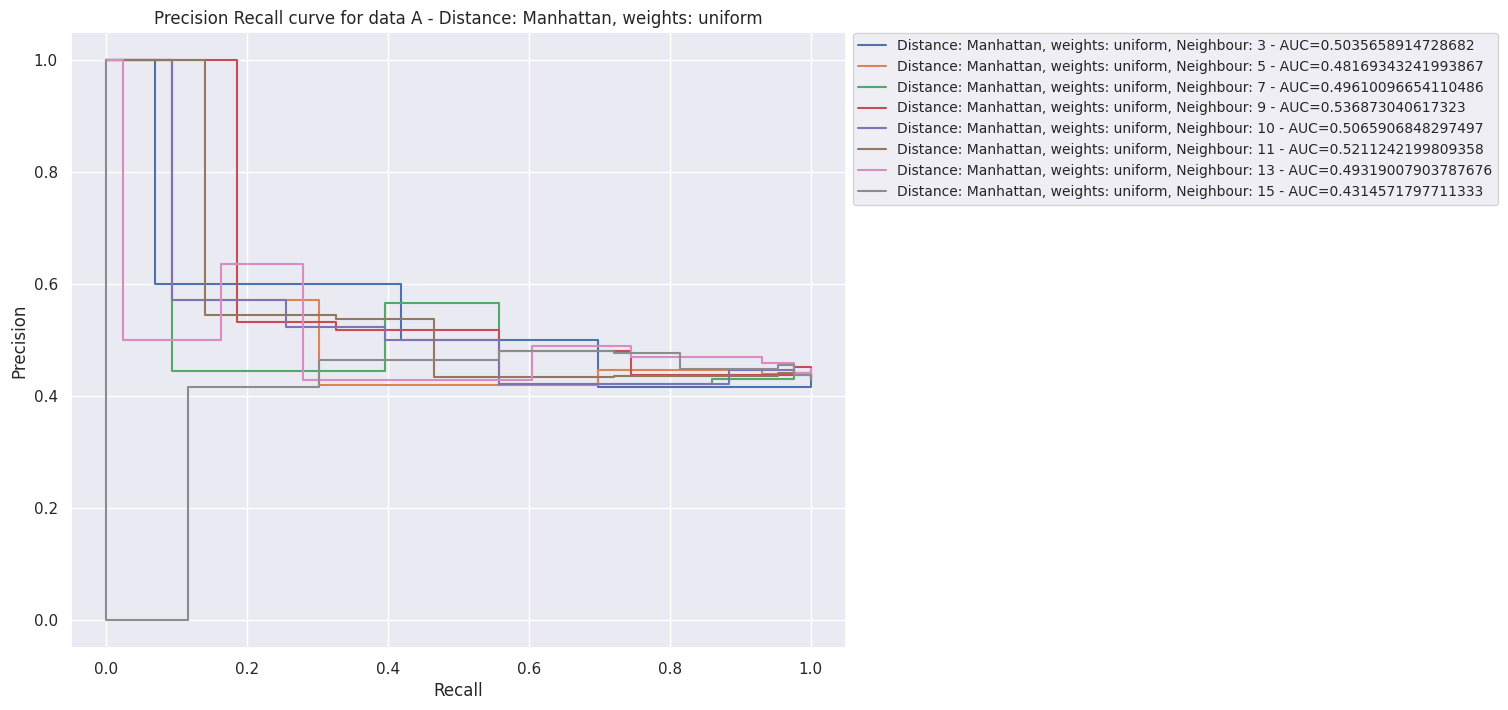

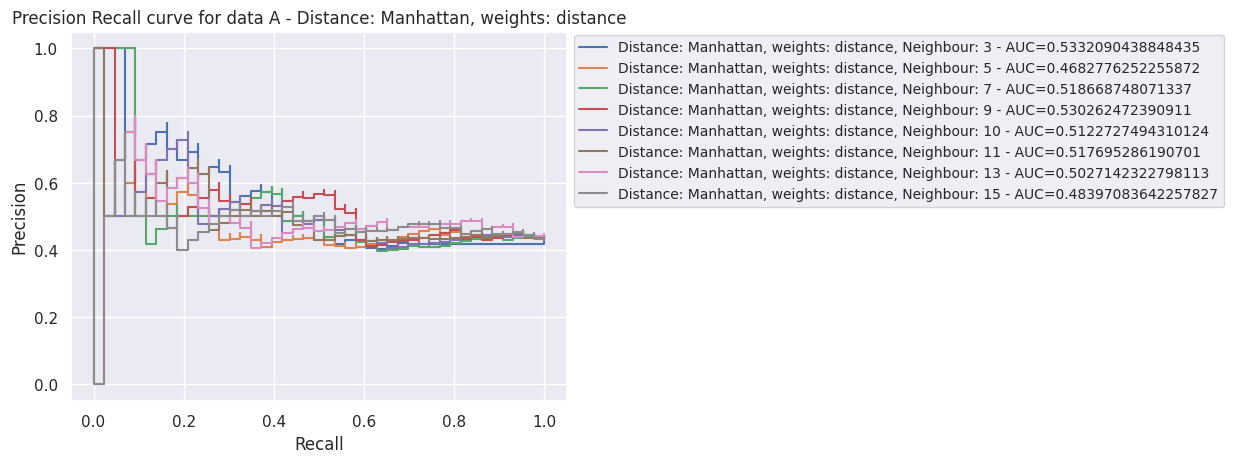

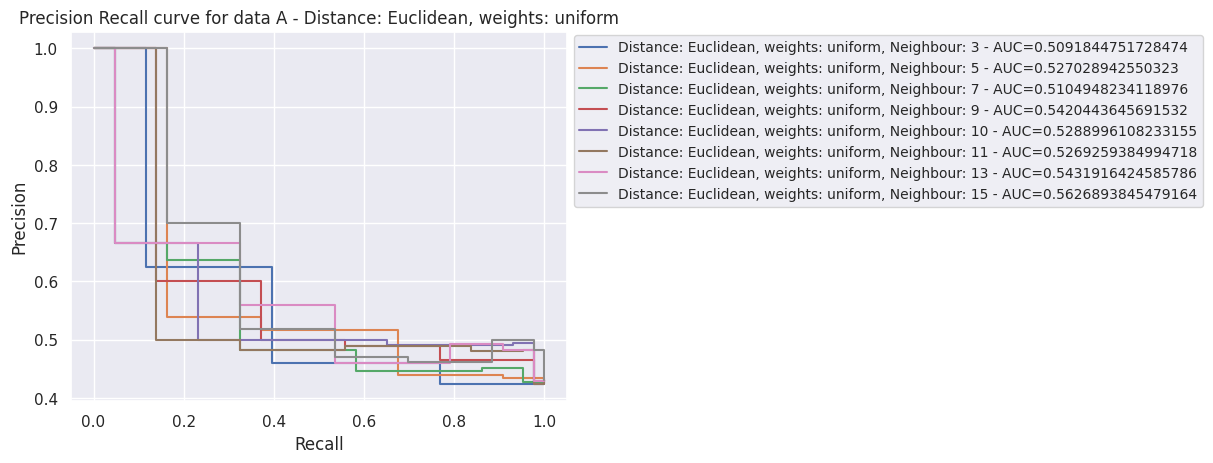

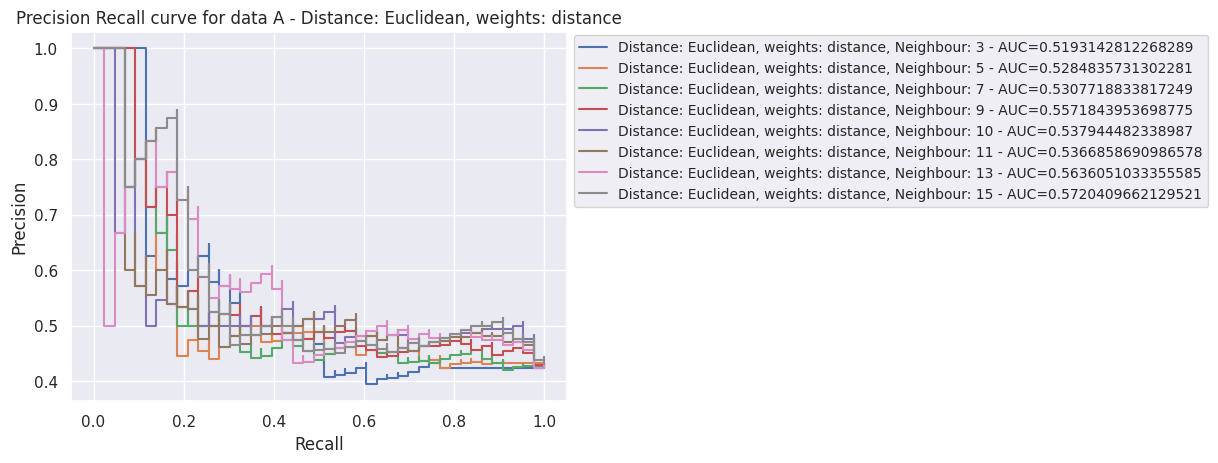

<Figure size 640x480 with 0 Axes>

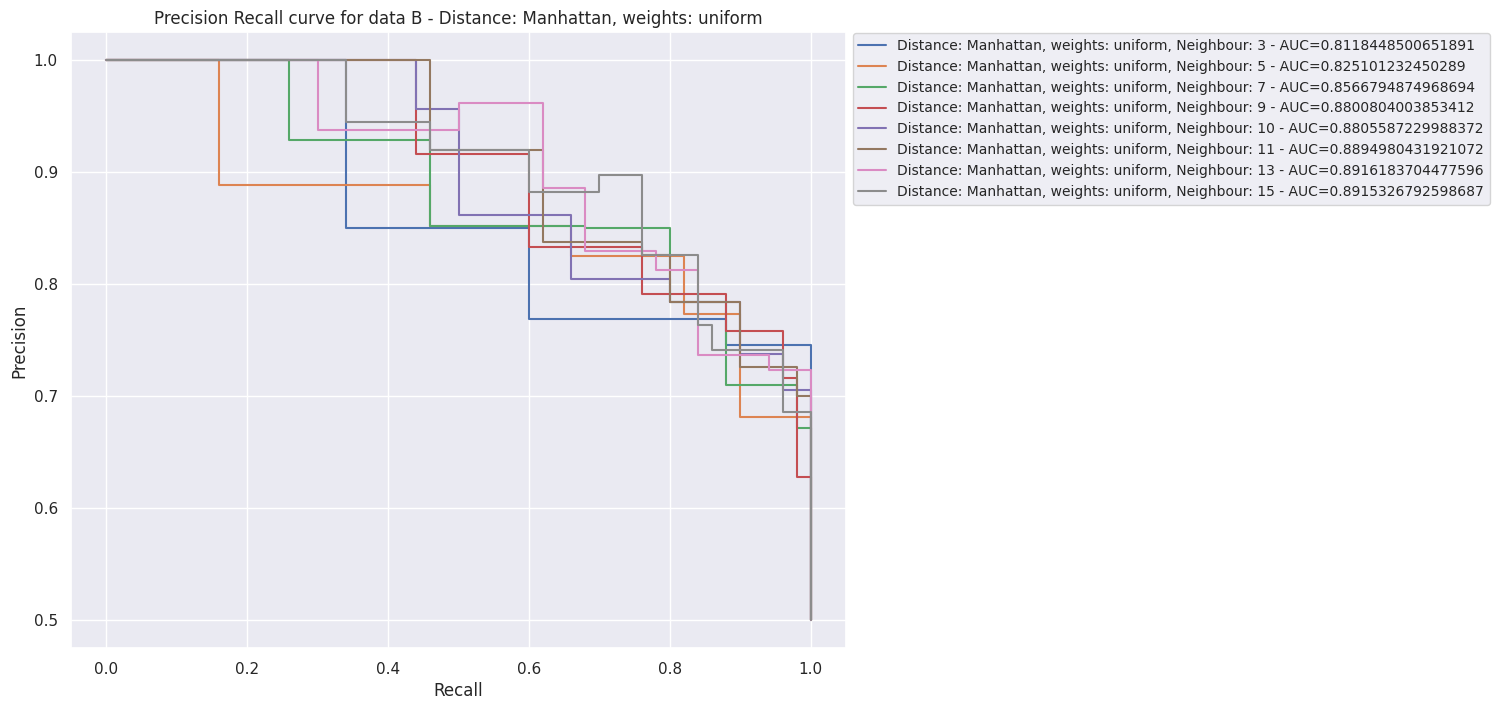

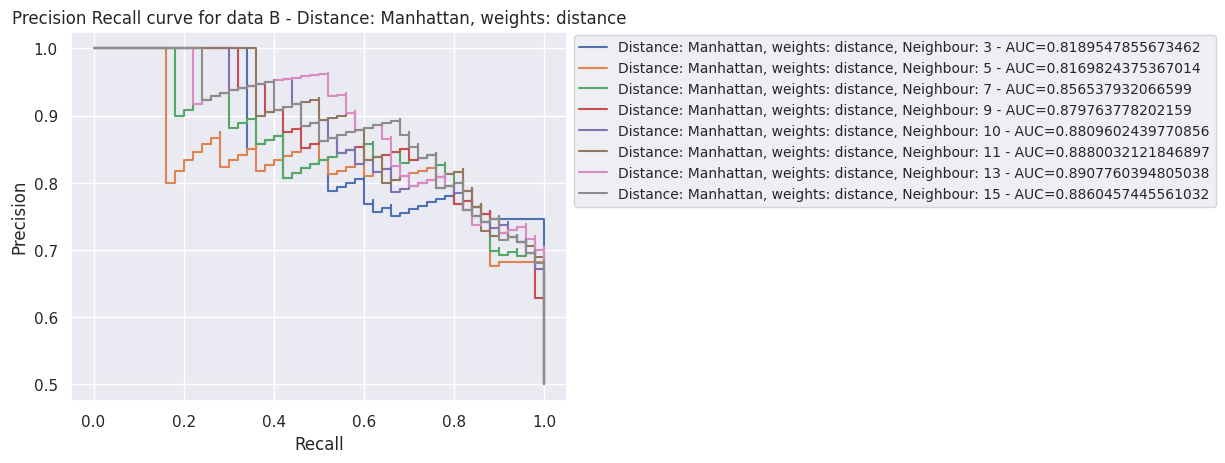

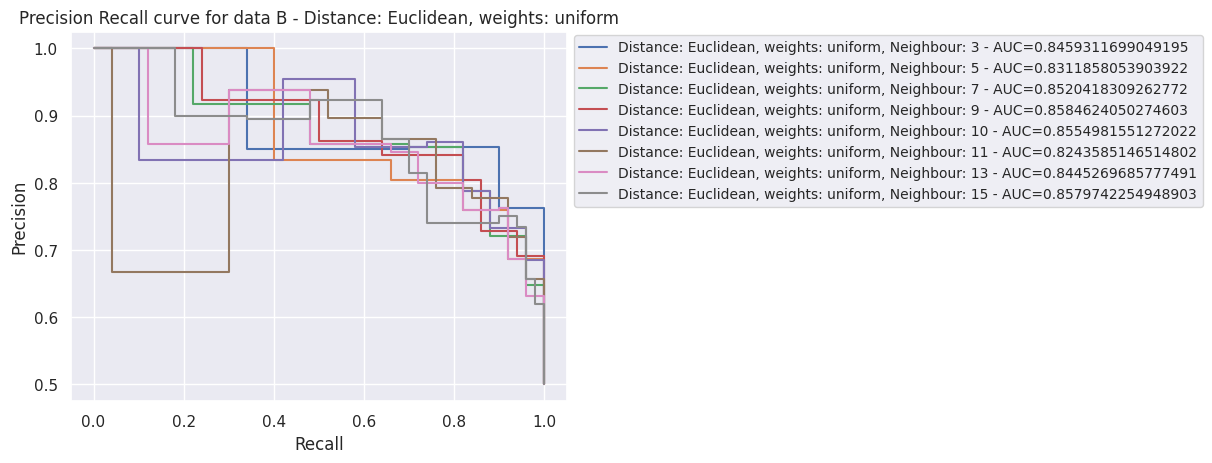

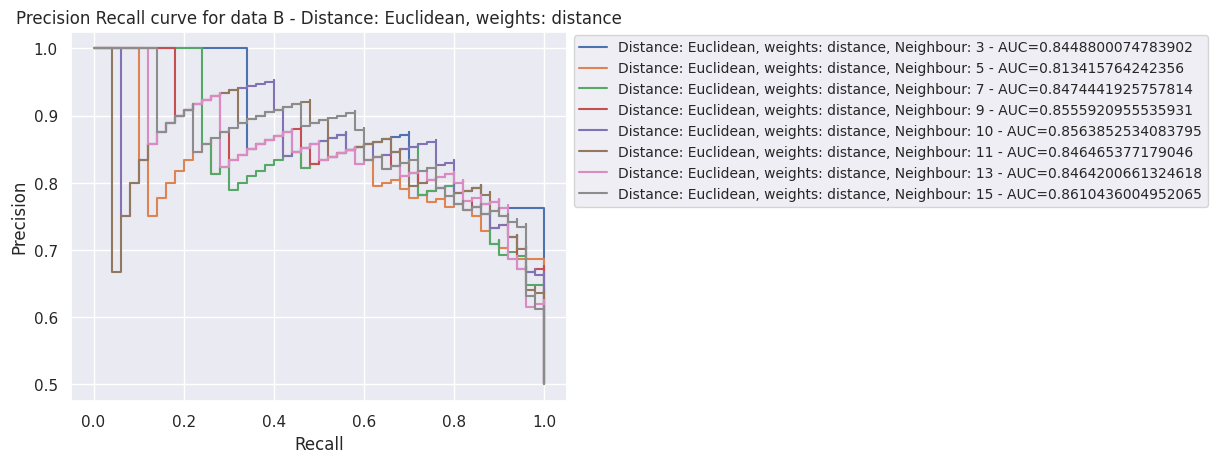

<Figure size 640x480 with 0 Axes>

In [13]:
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

def cross_validation(X, y, dataset_name):
    neighbours = [3, 5, 7, 9, 10, 11, 13, 15]
    plt.figure(figsize = (10,8))
    distance_types = ['', 'Manhattan', 'Euclidean']
    for distance_p in [1, 2]:
        # Here, distance_p = 1 is equivalent to using manhattan distance and
        # distance_p = 2 is equivalent to using euclidean distance
        for weights in ['uniform', 'distance']:
            for neighbour in neighbours:
                train_scores = []
                test_scores = []
                y_pred_probabilities = []
                y_reals = []
                for fold, (train_id, test_id) in enumerate(skf.split(X, y)):
                    X_train = X.iloc[train_id]
                    y_train = y.iloc[train_id]
                    X_test = X.iloc[test_id]
                    y_test = y.iloc[test_id]
                    knn = KNeighborsClassifier(n_neighbors = neighbour, weights = weights, p = distance_p)
                    knn.fit(X_train, y_train)
                    tr_score = knn.score(X_train, y_train)
                    train_scores.append(tr_score)
                    tst_score = knn.score(X_test, y_test)
                    test_scores.append(tst_score)
                    y_pred_proba = knn.predict_proba(X_test)[:,1]
                    y_pred_probabilities.append(y_pred_proba)
                    y_reals.append(y_test)
                y_real = np.concatenate(y_reals)
                y_proba = np.concatenate(y_pred_probabilities)
                precision, recall, _ = precision_recall_curve(y_real, y_proba)
                lab = f'Distance: {distance_types[distance_p]}, weights: {weights}, Neighbour: {neighbour} - AUC={(auc(recall, precision))}'
                plt.step(recall, precision, label=lab)
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision Recall curve for data {dataset_name} - Distance: {distance_types[distance_p]}, weights: {weights}')
            plt.legend(bbox_to_anchor=(1.0, 1.01), loc='upper left', fontsize='small')
            plt.figure()

cross_validation(X_a, y_a, 'A')
cross_validation(X_b, y_b, 'B')

Here we observe that the models for dataset B performed well (AUC 0.81 to 0.89) but the models for dataset A need improvement (AUC 0.43 to 0.57). Hence, we try to do the same exercise of K-folds CV for models for dataset A after dropping column X3 and then once more after dropping column X4 along with X3 to see if there is any improvement in the models like we have predicted in our hypothesis. For dataset B, the best performing model was produced for hyperparameters knn_n (neighbours) = 13, distance type = Manhattan and weights = uniform with AUC = 0.89.

DROP A FEATURE FOR DATASET A

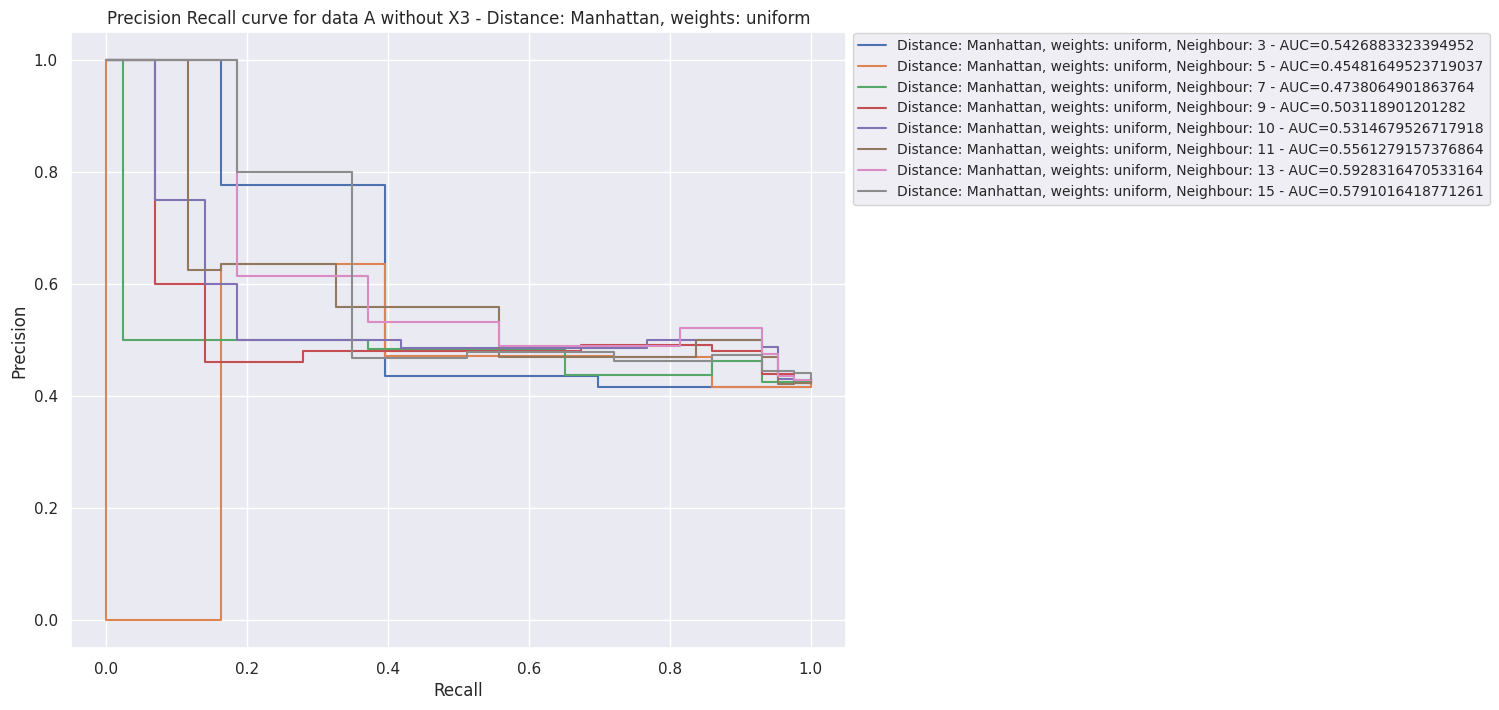

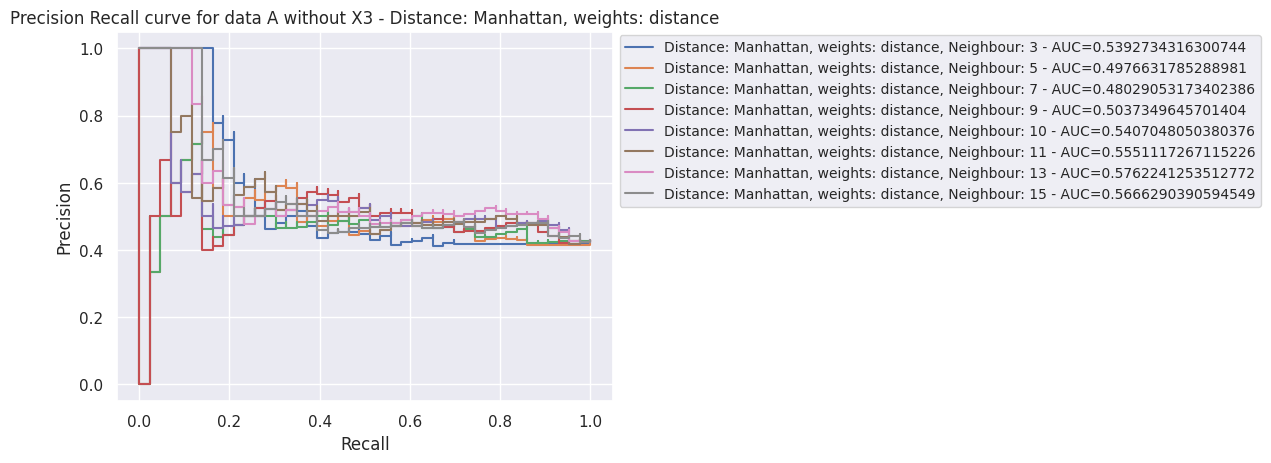

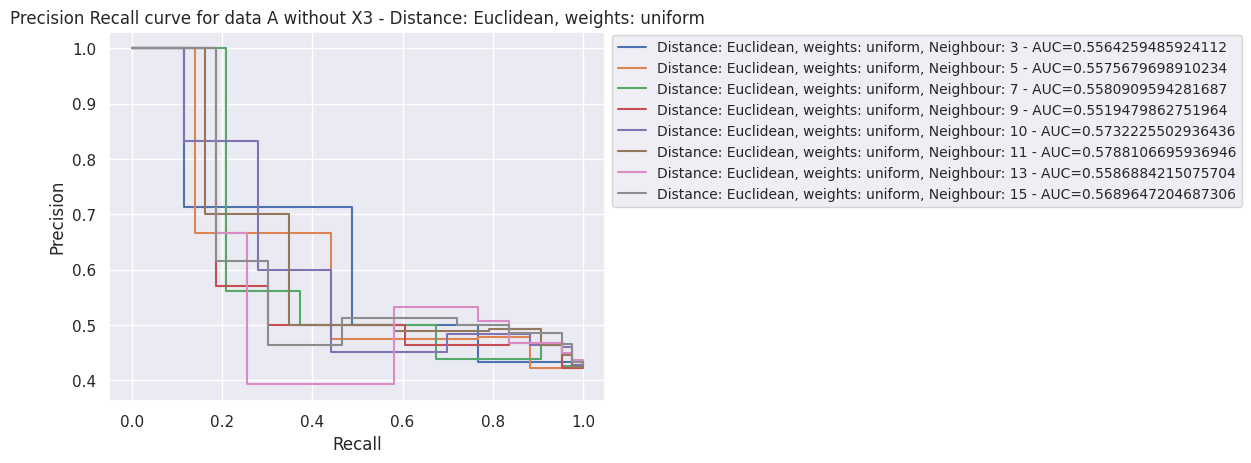

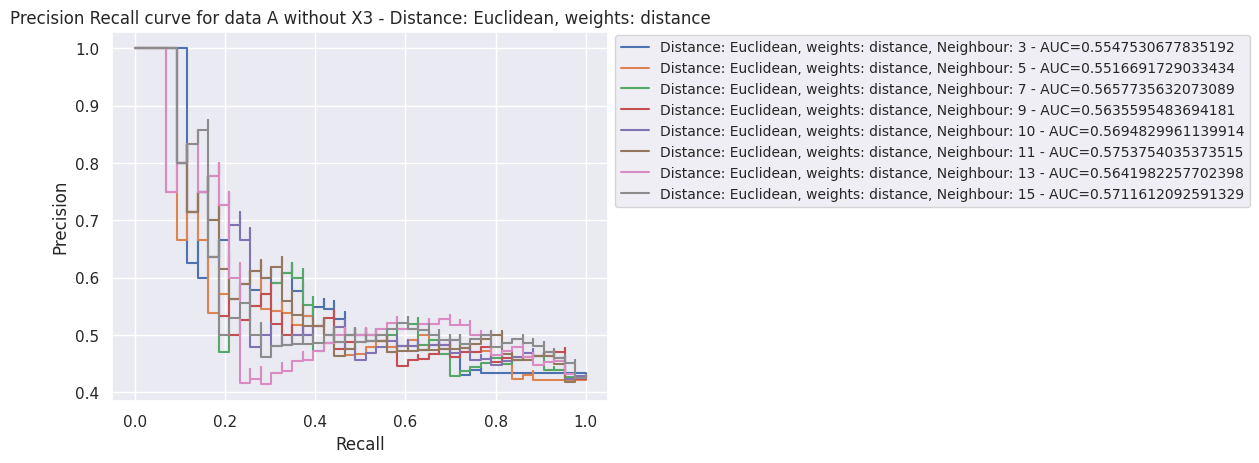

<Figure size 640x480 with 0 Axes>

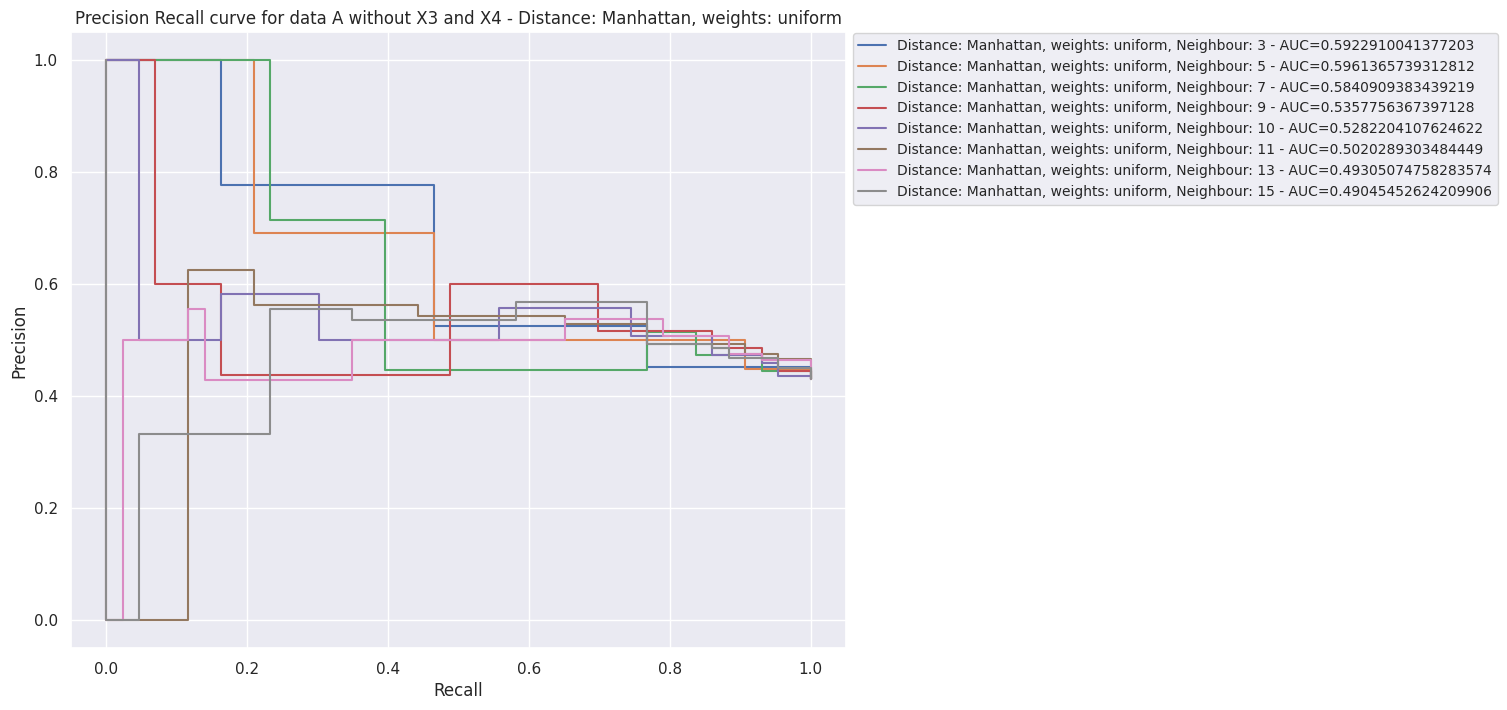

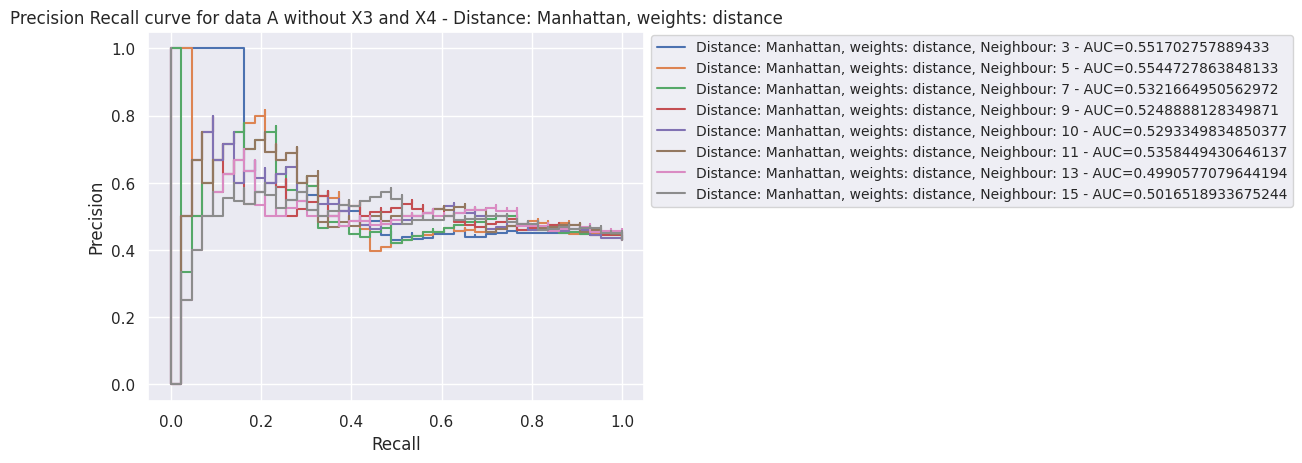

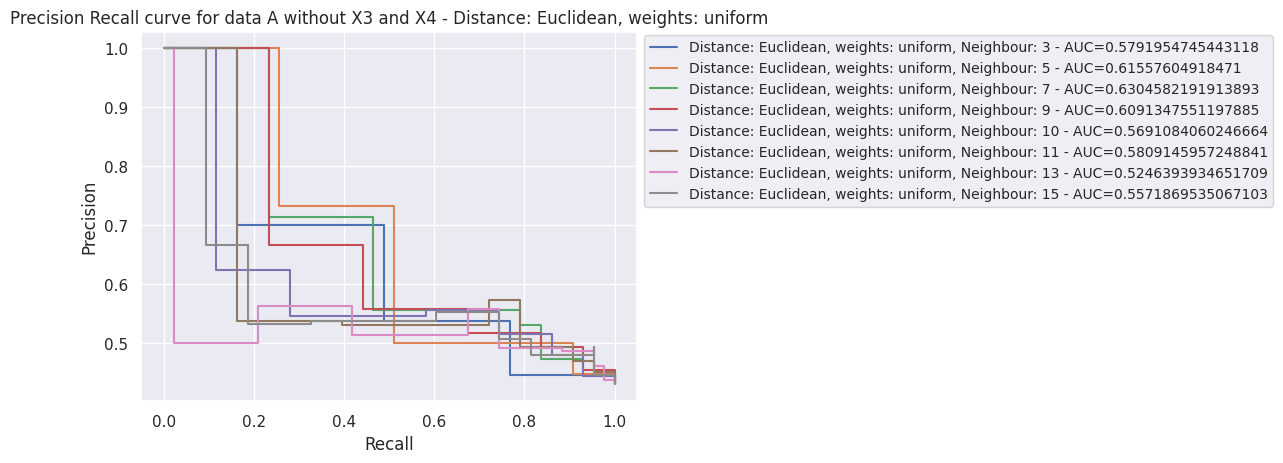

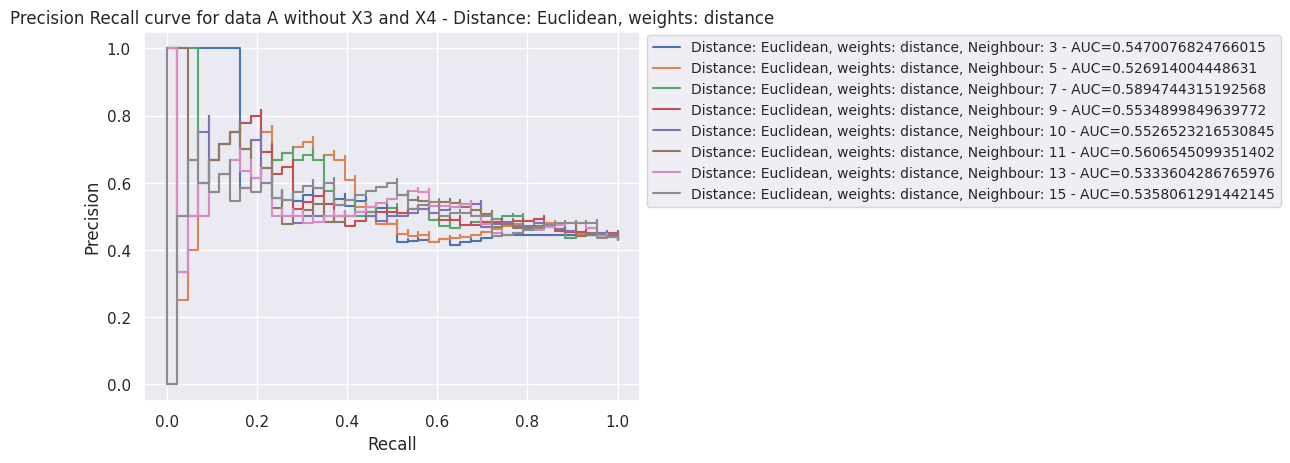

<Figure size 640x480 with 0 Axes>

In [14]:
X_a_without_X3_feature = X_a.drop(columns=['X3'])
X_a_without_X3_and_X4_features = X_a.drop(columns=['X3', 'X4'])
cross_validation(X_a_without_X3_feature, y_a, 'A without X3')
cross_validation(X_a_without_X3_and_X4_features, y_a, 'A without X3 and X4')

Here we can see that the models trained on dataset A without the X3 feature performed (AUC 0.45 to 0.59) better than our previous models for dataset A with the X3 feature. We see significant improvement in the models for dataset A after dropping both features X3 and X4 (AUC 0.45 to 0.63) as compared to our previous models for dataset A trained with all 5 features. The best performing model for dataset A after dropping both features X3 and X4 was trained with the hyperparameter values of knn_n (neighbours) = 7, distance type = Euclidean and weights = uniform with AUC of 0.63. Hence, we have confirmed our hypothesis that a knn model for dataset A would perform better after features X3 and X4 are dropped.

KNN MODEL FURTHER EVALUATION FOR BEST MODELS

Here we further evaluate and check metrics for the best knn models from our previous K Folds CV for dataset A with all 5 features, dataset A without features X3 and X4 & finally dataset B with all 5 features. We will make use of Stratified K Folds CV once again to get aggregated metrics over 10 folds.

In [15]:
skf2 = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

def build_and_eval_knn(X, y, dataset_name, neighbours, weights, distance):
    distance_types = ['', 'Manhattan', 'Euclidean']
    print(f'Model Eval for {dataset_name} - Neighbours: {neighbours}, Distance: {distance_types[distance]}, weights: {weights}')
    knn = KNeighborsClassifier(n_neighbors = neighbours, weights = weights, p = distance)
    cross_val_ROC_AUC = cross_val_score(knn, X, y, cv=skf2, scoring='roc_auc').mean()
    print(f'Cross validated ROC AUC : {cross_val_ROC_AUC}')
    acc = cross_val_score(knn, X, y, cv = skf2, scoring='accuracy').mean()
    print(f'Cross-validation accuracy: {acc}')
    precision = cross_val_score(knn, X, y, cv = skf2, scoring='precision').mean()
    print(f'Cross-validation precision: {precision}')
    recall = cross_val_score(knn, X, y, cv = skf2, scoring='recall').mean()
    print(f'Cross-validation recall: {recall}')
    f1 = cross_val_score(knn, X, y, cv = skf2, scoring='f1').mean()
    print(f'Cross-validation F1: {f1}')
    print('\n')


build_and_eval_knn(X_a, y_a, 'A', 15, 'distance', 2)
build_and_eval_knn(X_a_without_X3_and_X4_features, y_a, 'A without X3 and X4', 7, 'uniform', 2)
build_and_eval_knn(X_b, y_b, 'B', 13, 'uniform', 1)

Model Eval for A - Neighbours: 15, Distance: Euclidean, weights: distance
Cross validated ROC AUC : 0.6176666666666668
Cross-validation accuracy: 0.57
Cross-validation precision: 0.5
Cross-validation recall: 0.305
Cross-validation F1: 0.3718253968253969


Model Eval for A without X3 and X4 - Neighbours: 7, Distance: Euclidean, weights: uniform
Cross validated ROC AUC : 0.6624999999999999
Cross-validation accuracy: 0.61
Cross-validation precision: 0.5233333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-validation recall: 0.465
Cross-validation F1: 0.45857142857142863


Model Eval for B - Neighbours: 13, Distance: Manhattan, weights: uniform
Cross validated ROC AUC : 0.906
Cross-validation accuracy: 0.7699999999999999
Cross-validation precision: 0.9066666666666666
Cross-validation recall: 0.6199999999999999
Cross-validation F1: 0.7122222222222222




As expected, we can observe that the models for dataset A without the features X3 and X4 performed better than those with all 5 features.

CREATE FINAL KNN MODELS

In [16]:
def build_knn(X, y, neighbours, weights, distance):
    knn = KNeighborsClassifier(n_neighbors = neighbours, weights = weights, p = distance)
    knn.fit(X, y)
    return knn

final_knn_a = build_knn(X_a_without_X3_and_X4_features, y_a, 7, 'uniform', 2)
final_knn_b = build_knn(X_b, y_b, 13, 'uniform', 1)